In [17]:
#Req1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [18]:
#Data Downloading
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
print(info)#Data Downloading
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [23]:
from typing import cast
#Splitting the data
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']
# 4. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomCrop(224, 224),
])

# 5. Normalization
# (mean=0.5, std=0.5) approximate normalization
def preprocess(img, label):
    img = tf.image.resize(img, (224, 224))  # Resize first
    img = tf.cast(img, tf.float32) / 255.0   # Scale to [0,1]
    img = (img - 0.5) / 0.5                  # Normalize to [-1,1]
    return img, label

train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

# Apply augmentation only on training
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

# Batch and Prefetch
batch_size = 32
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [24]:
#Req2 
from keras.applications import VGG16
from keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
base_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3)) #drop output layer
#Disabling all the the learning rate but the last 2 so the neural network adjust the features on the last 2 layers
for layer in base_model.layers[0:-2]:
  layer.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 2,359,808 (9.00 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

In [25]:
#Req3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    base_model,  # Pre-trained base model
    layers.GlobalAveragePooling2D(),  # Pooling layer
    Dropout(0.5),
    layers.Dense(102, activation='softmax')  # Output layer for 102 classes
])
# Create learning rate schedule

# Early stopping callback to monitor validation loss and stop training early if it doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3,  # Stop after 3 epochs without improvement
                               restore_best_weights=True)

# Learning rate scheduler callback starts with 1e-3 and change every 2 same validation loss by *0.5
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-3)

# TensorBoard callback to log metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse if labels are integers
              metrics=['accuracy'])

# Print model summary to confirm the layers
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 102)                 │          52,326 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,767,014 (56.33 MB)

 Trainable params: 2,412,134 (9.20 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

In [26]:
# Train the model with callbacks
history = model.fit(
    train_dataset,  # Ensure batching and prefetching
    epochs=40, 
    validation_data=validation_dataset,
    callbacks=[early_stopping,reduce_lr]
)

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 613ms/step - accuracy: 0.0173 - loss: 4.9073 - val_accuracy: 0.1029 - val_loss: 4.2445 - learning_rate: 0.0010
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 576ms/step - accuracy: 0.0873 - loss: 4.2358 - val_accuracy: 0.2569 - val_loss: 3.5987 - learning_rate: 0.0010
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 548ms/step - accuracy: 0.1432 - loss: 3.7274 - val_accuracy: 0.3598 - val_loss: 2.9873 - learning_rate: 0.0010
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 533ms/step - accuracy: 0.2414 - loss: 3.2040 - val_accuracy: 0.4686 - val_loss: 2.4989 - learning_rate: 0.0010
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 547ms/step - accuracy: 0.3271 - loss: 2.8374 - val_accuracy: 0.5569 - val_loss: 2.1527 - learning_rate: 0.0010
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.3871 - loss: 2.4213 - val_accuracy: 0.5990 - val_loss: 1.8590 - learning_rate: 0.0010
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 558ms/step - accuracy: 0.4445 - loss: 2.

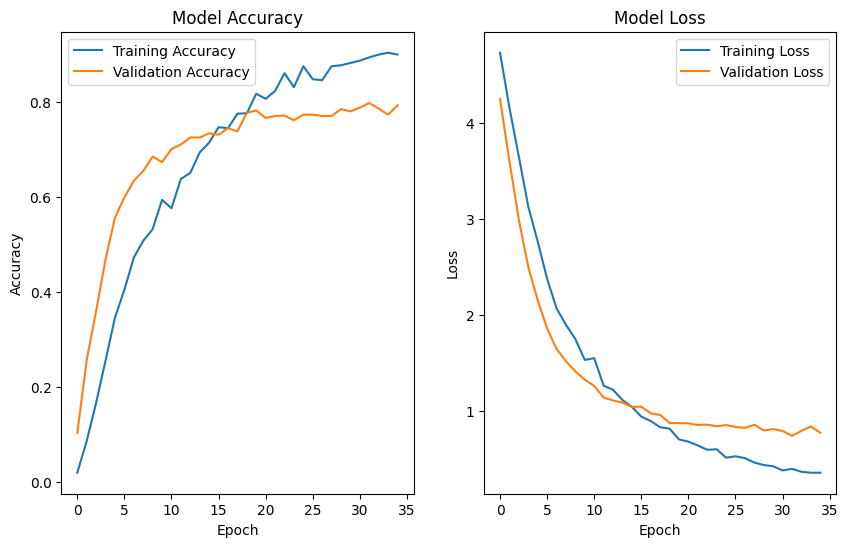

In [45]:
#plotting Model Accuracy and Loss
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 45s 233ms/step - accuracy: 0.7586 - loss: 0.9287
Test Loss: 0.9004
Test Accuracy: 0.7663


In [39]:
y_true = []
y_pred = []
images_list = []
#making a list of output prediction to apply classification metrics
for images, labels in test_dataset:
    preds = model.predict(images,verbose  = 0)
    preds_classes = np.argmax(preds, axis=1)  # Convert softmax probabilities to class labels
    y_true.extend(labels.numpy())
    y_pred.extend(preds_classes)
    images_list.extend(images.numpy())  # Save the actual images

In [34]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
print(f"Model Recall : {recall_score(y_true,y_pred,average = 'macro')}")
print(f"Model Precision : {precision_score(y_true,y_pred,average = 'macro')}")
print(f"Model F1 Score : {f1_score(y_true,y_pred,average = 'macro')}")

Model Recall : 0.7923019037927137
Model Precision : 0.7629070871308449
Model F1 Score : 0.7624495142047307


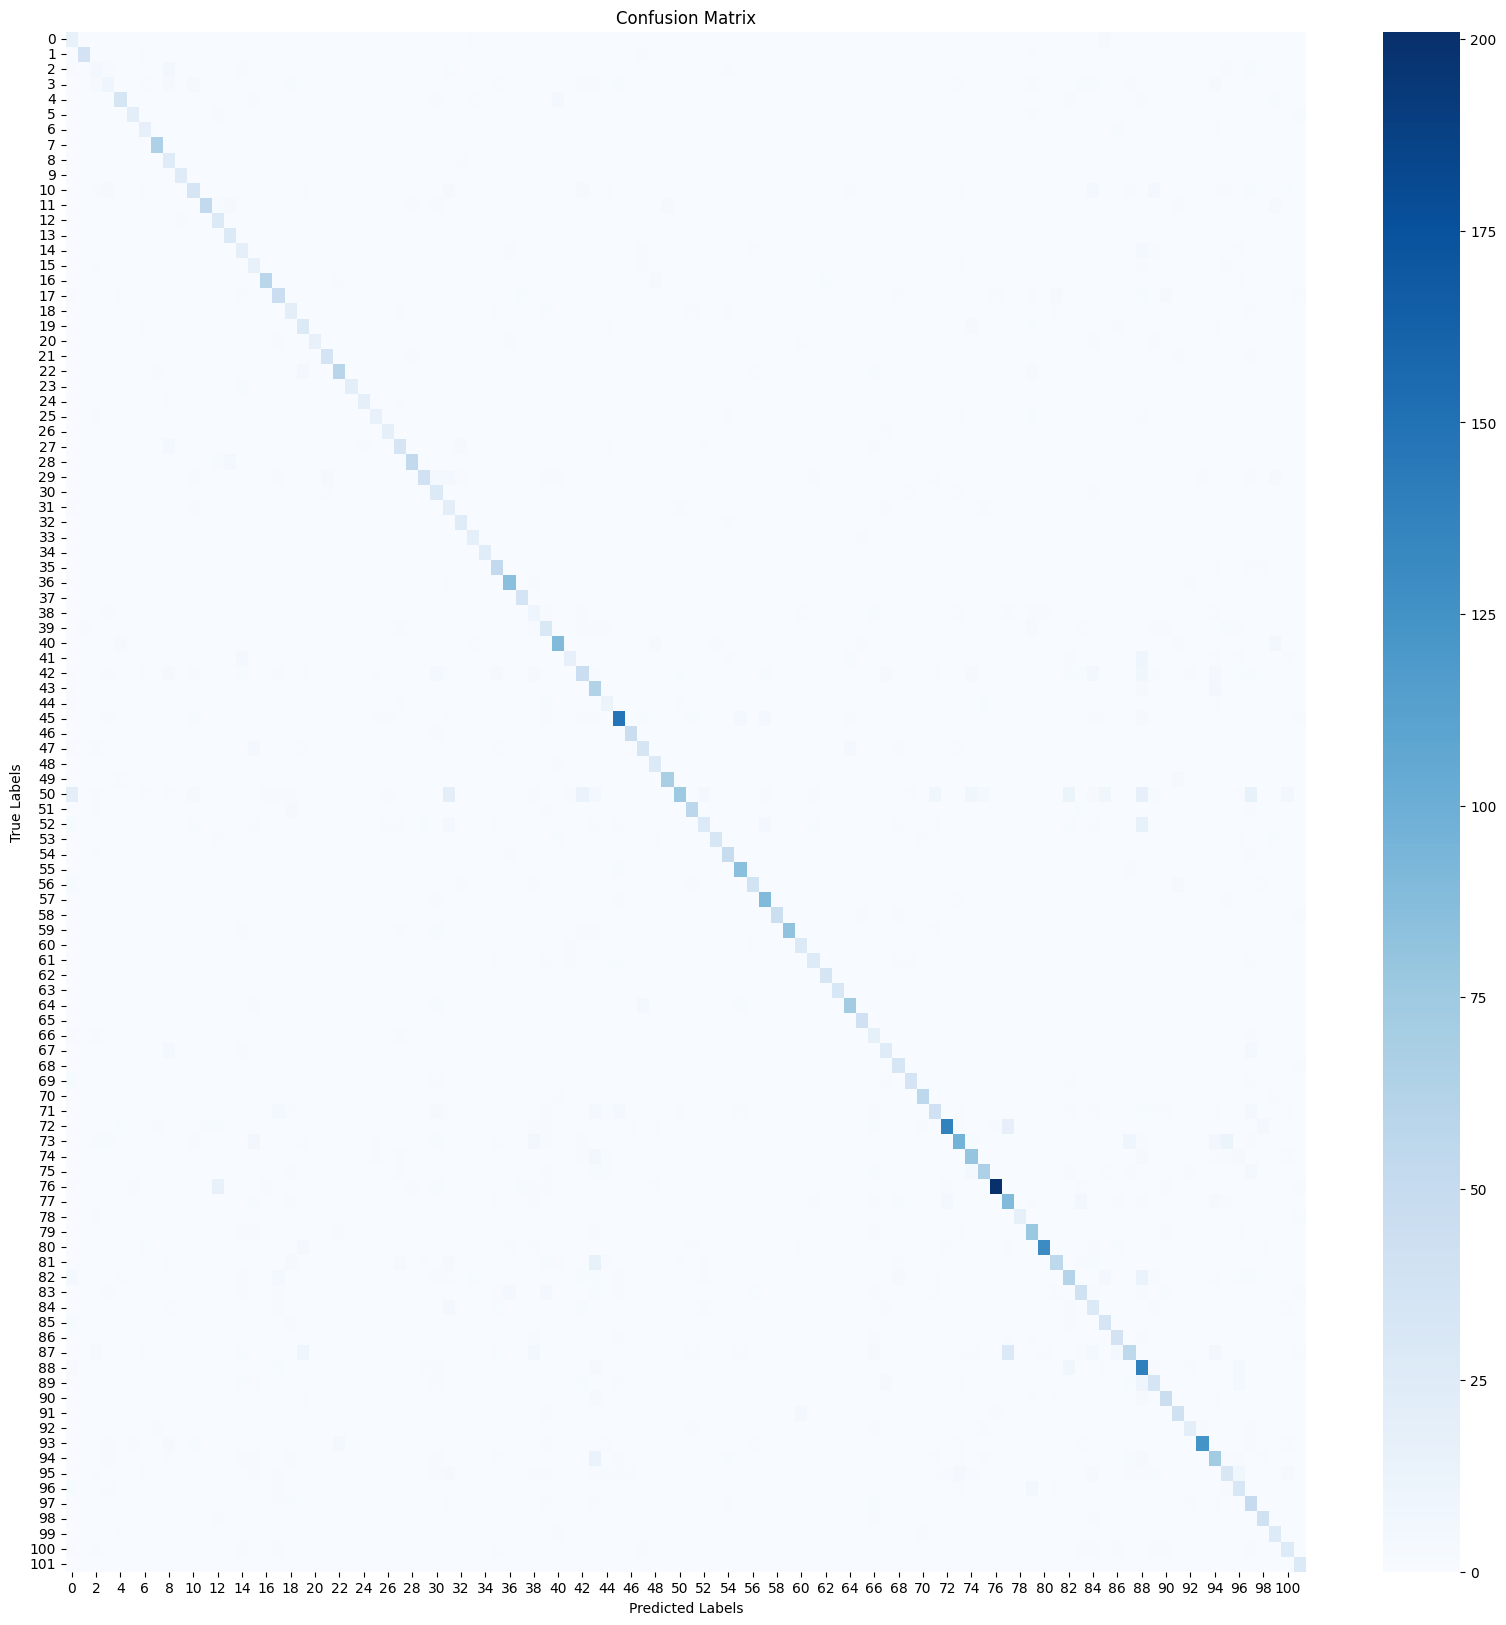

In [36]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
#Converting it into numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)
images_list = np.array(images_list)

# Find correctly classified images
correct_indices = np.where(y_true == y_pred)[0]

# Find incorrectly classified images
incorrect_indices = np.where(y_true != y_pred)[0]

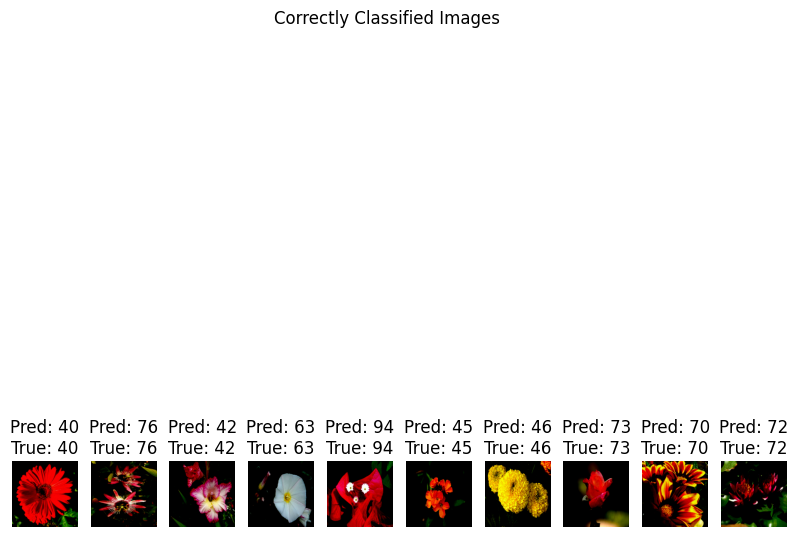

In [46]:
plt.figure(figsize=(10,10))
for i, idx in enumerate(correct_indices[:10]):
    plt.subplot(1, 10, i+1)
    plt.imshow(images_list[idx])
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_true[idx]}")
    plt.axis('off')
plt.suptitle('Correctly Classified Images')
plt.show()

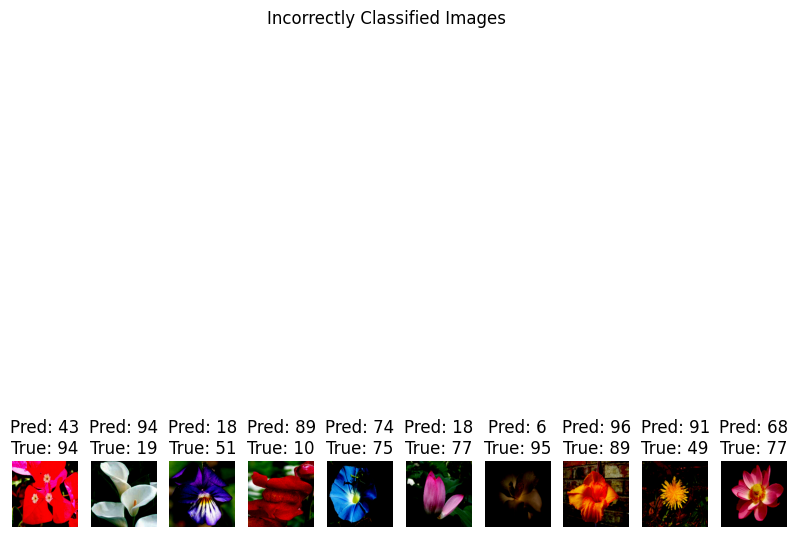

In [47]:
# Show 10 incorrectly classified images
plt.figure(figsize=(10,10))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(1, 10, i+1)
    plt.imshow(images_list[idx])
    plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_true[idx]}")
    plt.axis('off')
plt.suptitle('Incorrectly Classified Images')
plt.show()